In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data =  pd.read_csv("poly.csv")

In [3]:
data.head()

,zaman,sicaklik
0,1,0
1,3,9
2,5,20
3,10,35
4,15,60


In [4]:
x = data.iloc[:,0].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)

In [5]:
x

array([[  1],
       [  3],
       [  5],
       [ 10],
       [ 15],
       [ 18],
       [ 25],
       [ 32],
       [ 39],
       [ 50],
       [ 60],
       [ 80],
       [105],
       [120],
       [200],
       [350]], dtype=int64)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
lr.fit(x,y)

LinearRegression()

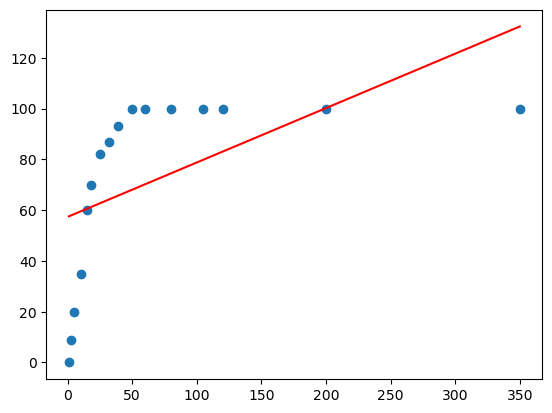

In [9]:
plt.scatter(x,y)    
plt.plot(x,lr.predict(x),color="red")

In [10]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=4)   

In [11]:
xpl = pr.fit_transform(x)

In [12]:
xpl #

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, 1.25000000e+02,
        6.25000000e+02],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, 1.00000000e+03,
        1.00000000e+04],
       [1.00000000e+00, 1.50000000e+01, 2.25000000e+02, 3.37500000e+03,
        5.06250000e+04],
       [1.00000000e+00, 1.80000000e+01, 3.24000000e+02, 5.83200000e+03,
        1.04976000e+05],
       [1.00000000e+00, 2.50000000e+01, 6.25000000e+02, 1.56250000e+04,
        3.90625000e+05],
       [1.00000000e+00, 3.20000000e+01, 1.02400000e+03, 3.27680000e+04,
        1.04857600e+06],
       [1.00000000e+00, 3.90000000e+01, 1.52100000e+03, 5.93190000e+04,
        2.31344100e+06],
       [1.00000000e+00, 5.00000000e+01, 2.50000000e+03, 1.25000000e+05,
        6.25000000e+06],
       [1.00000000e+00, 6.0000

In [15]:
lr2 = LinearRegression()

In [16]:
lr2.fit(xpl,y)

LinearRegression()

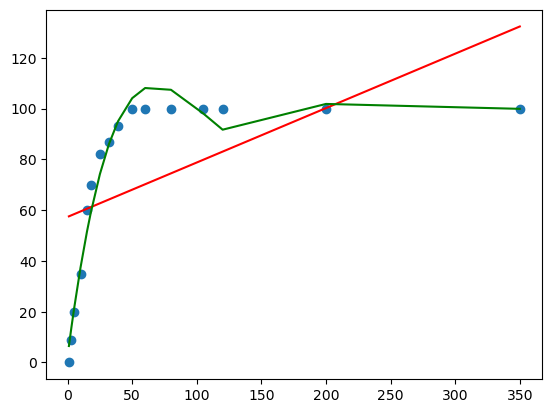

In [17]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color="red")   
plt.plot(x,lr2.predict(xpl),color="green")  

In [18]:
yhead = lr2.predict(xpl)

In [19]:
yhead 

array([[  6.47633614],
       [ 13.98182617],
       [ 21.11544977],
       [ 37.38980622],
       [ 51.56137883],
       [ 59.11869158],
       [ 74.20206949],
       [ 86.03295022],
       [ 94.98849847],
       [104.10913269],
       [108.10086558],
       [107.41114976],
       [ 98.07720638],
       [ 91.69252464],
       [101.83642064],
       [ 99.90569341]])

In [20]:
from sklearn.metrics import r2_score,mean_squared_error

# Metrics for Linear Regression / Lineer Regresyon için Metrikler
y_pred_linear = lr.predict(x)   
rsme_linear = np.sqrt(mean_squared_error(y,y_pred_linear))  
r2_linear = r2_score(y,y_pred_linear)   

# Metrics for Polynomial Regression / Polinom Regresyon için Metrikler
y_pred_poly = lr2.predict(xpl)
rsme_poly = np.sqrt(mean_squared_error(y,y_pred_poly))  
r2_poly = r2_score(y,y_pred_poly)   

print(f" Linear Regression RSME : {rsme_linear} \n Linear Regression R2 : {r2_linear} \n Polynomial Regression RSME : {rsme_poly} \n Polynomial Regression R2 : {r2_poly}")

 Linear Regression RSME : 29.370307035713182 
 Linear Regression R2 : 0.29679324573531307 
 Polynomial Regression RSME : 5.823196650937771 
 Polynomial Regression R2 : 0.9723567581511242


In [21]:
new_value = np.array([[26]])

# Conver this value with same Polynomial Regression object / Bu değeri aynı Polinom Regresyon objesi ile dönüştür
new_value_transformed = pr.transform(new_value) 

# Now predict with this new value  / Şimdi bu yeni değeri tahmin et
predict_value = lr2.predict(new_value_transformed) 

print(f"Predicted value for {new_value} is {predict_value}")  

Predicted value for [[26]] is [[76.08233319]]
